In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [ ]:
#importing our dataset
cereal = pd.read_csv("/content/cereal.csv")
print(cereal.head(10))

                        name mfr type  calories  protein  fat  sodium  fiber  \
0                  100% Bran   N    C        70        4    1     130   10.0   
1          100% Natural Bran   Q    C       120        3    5      15    2.0   
2                   All-Bran   K    C        70        4    1     260    9.0   
3  All-Bran with Extra Fiber   K    C        50        4    0     140   14.0   
4             Almond Delight   R    C       110        2    2     200    1.0   
5    Apple Cinnamon Cheerios   G    C       110        2    2     180    1.5   
6                Apple Jacks   K    C       110        2    0     125    1.0   
7                    Basic 4   G    C       130        3    2     210    2.0   
8                  Bran Chex   R    C        90        2    1     200    4.0   
9                Bran Flakes   P    C        90        3    0     210    5.0   

   carbo  sugars  potass  vitamins  shelf  weight  cups     rating  
0    5.0       6     280        25      3    1.00 

In [ ]:
cols = cereal.columns
print(cols)

Index(['name', 'mfr', 'type', 'calories', 'protein', 'fat', 'sodium', 'fiber',
       'carbo', 'sugars', 'potass', 'vitamins', 'shelf', 'weight', 'cups',
       'rating'],
      dtype='object')


In [ ]:
cereal.shape

(77, 16)

In [ ]:
cereal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      77 non-null     object 
 1   mfr       77 non-null     object 
 2   type      77 non-null     object 
 3   calories  77 non-null     int64  
 4   protein   77 non-null     int64  
 5   fat       77 non-null     int64  
 6   sodium    77 non-null     int64  
 7   fiber     77 non-null     float64
 8   carbo     77 non-null     float64
 9   sugars    77 non-null     int64  
 10  potass    77 non-null     int64  
 11  vitamins  77 non-null     int64  
 12  shelf     77 non-null     int64  
 13  weight    77 non-null     float64
 14  cups      77 non-null     float64
 15  rating    77 non-null     float64
dtypes: float64(5), int64(8), object(3)
memory usage: 9.8+ KB


In [ ]:
cereal["type"].unique()

array(['C', 'H'], dtype=object)

In [ ]:
cereal.describe()

,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
count,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000
mean,106.883117,2.545455,1.012987,159.675325,2.151948,14.597403,6.922078,96.077922,28.246753,2.207792,1.029610,0.821039,42.665705
std,19.484119,1.094790,1.006473,83.832295,2.383364,4.278956,4.444885,71.286813,22.342523,0.832524,0.150477,0.232716,14.047289
min,50.000000,1.000000,0.000000,0.000000,0.000000,-1.000000,-1.000000,-1.000000,0.000000,1.000000,0.500000,0.250000,18.042851
25%,100.000000,2.000000,0.000000,130.000000,1.000000,12.000000,3.000000,40.000000,25.000000,1.000000,1.000000,0.670000,33.174094
50%,110.000000,3.000000,1.000000,180.000000,2.000000,14.000000,7.000000,90.000000,25.000000,2.000000,1.000000,0.750000,40.400208
75%,110.000000,3.000000,2.000000,210.000000,3.000000,17.000000,11.000000,120.000000,25.000000,3.000000,1.000000,1.000000,50.828392
max,160.000000,6.000000,5.000000,320.000000,14.000000,23.000000,15.000000,330.000000,100.000000,3.000000,1.500000,1.500000,93.704912


In [ ]:
cereal.carbo = np.where(cereal["carbo"] < 0, 0, cereal["carbo"])
cereal.sugars = np.where(cereal["sugars"] < 0, 0, cereal["sugars"])
cereal.potass = np.where(cereal["potass"] < 0, 0, cereal["potass"])

In [ ]:
cereal.describe()

,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
count,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000
mean,106.883117,2.545455,1.012987,159.675325,2.151948,14.610390,6.935065,96.103896,28.246753,2.207792,1.029610,0.821039,42.665705
std,19.484119,1.094790,1.006473,83.832295,2.383364,4.232257,4.422840,71.251147,22.342523,0.832524,0.150477,0.232716,14.047289
min,50.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.500000,0.250000,18.042851
25%,100.000000,2.000000,0.000000,130.000000,1.000000,12.000000,3.000000,40.000000,25.000000,1.000000,1.000000,0.670000,33.174094
50%,110.000000,3.000000,1.000000,180.000000,2.000000,14.000000,7.000000,90.000000,25.000000,2.000000,1.000000,0.750000,40.400208
75%,110.000000,3.000000,2.000000,210.000000,3.000000,17.000000,11.000000,120.000000,25.000000,3.000000,1.000000,1.000000,50.828392
max,160.000000,6.000000,5.000000,320.000000,14.000000,23.000000,15.000000,330.000000,100.000000,3.000000,1.500000,1.500000,93.704912


In [ ]:
cereal_num = cereal.drop(["name", "mfr"], axis=1)
cereal_num.columns

Index(['type', 'calories', 'protein', 'fat', 'sodium', 'fiber', 'carbo',
       'sugars', 'potass', 'vitamins', 'shelf', 'weight', 'cups', 'rating'],
      dtype='object')

In [ ]:
#One hot encoding with pandas get_dummies
cereal_new_type = pd.get_dummies(cereal_num["type"], drop_first=True)
cereal_num = pd.concat([cereal_num, cereal_new_type], axis=1)
cereal_num.drop("type", axis = 1, inplace = True)
cereal_num.head()

,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating,H
0,70,4,1,130,10.0,5.0,6,280,25,3,1.0,0.33,68.402973,0
1,120,3,5,15,2.0,8.0,8,135,0,3,1.0,1.00,33.983679,0
2,70,4,1,260,9.0,7.0,5,320,25,3,1.0,0.33,59.425505,0
3,50,4,0,140,14.0,8.0,0,330,25,3,1.0,0.50,93.704912,0
4,110,2,2,200,1.0,14.0,8,0,25,3,1.0,0.75,34.384843,0


In [ ]:
cereal_num.shape

(77, 14)

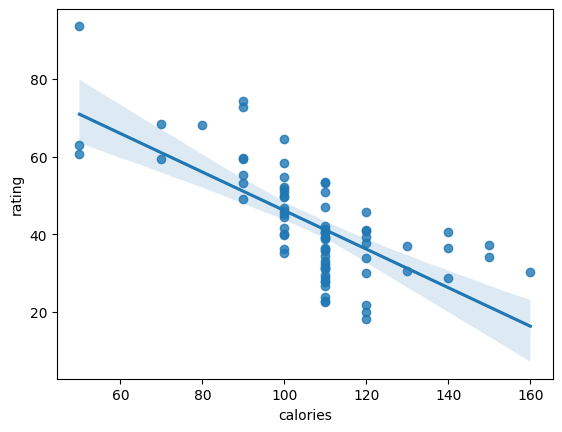

In [ ]:
sns.regplot(data=cereal_num, x="calories", y="rating")
plt.show()

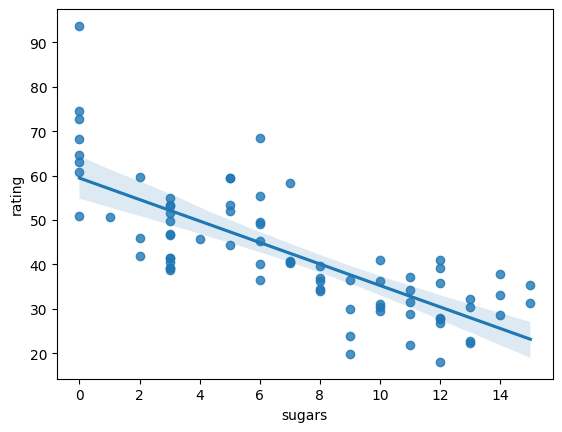

In [ ]:
sns.regplot(data=cereal_num, x="sugars", y="rating")
plt.show()

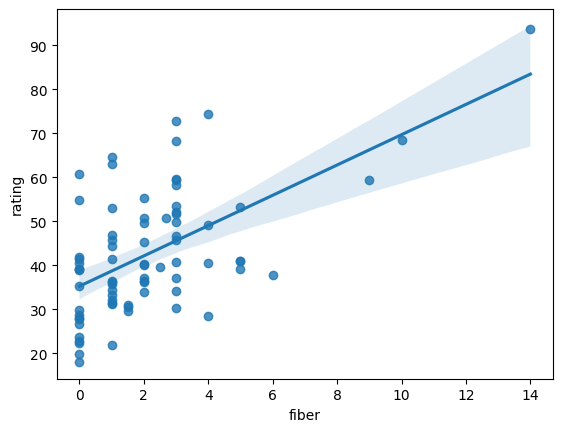

In [ ]:
sns.regplot(data=cereal_num, x="fiber", y="rating")
plt.show()

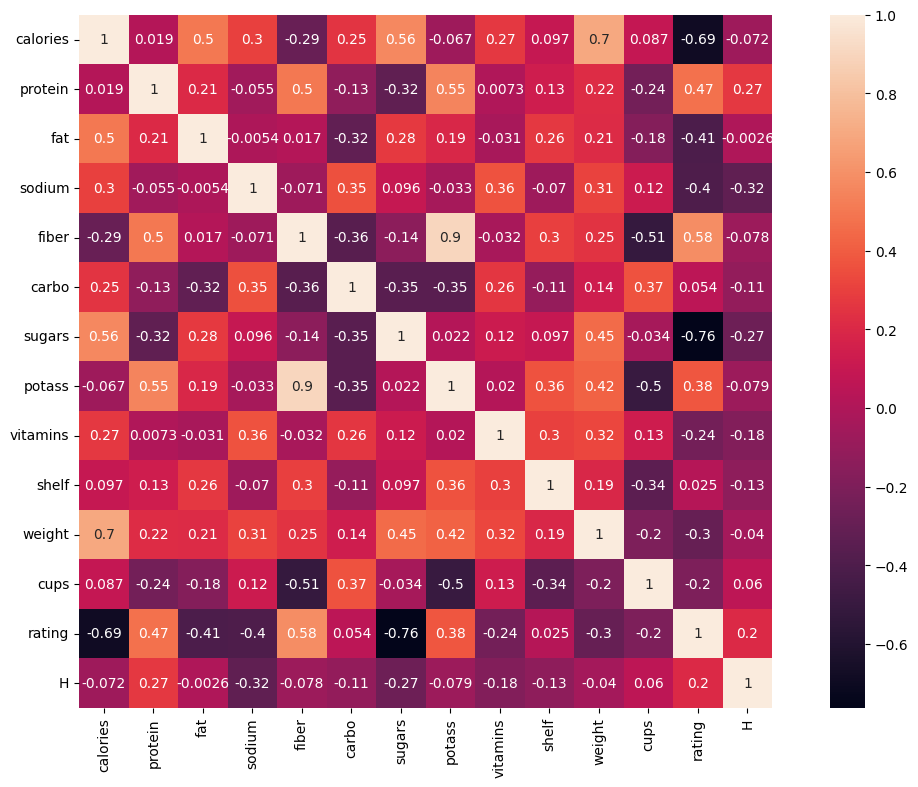

In [ ]:
plt.figure(figsize=(15,9))
sns.heatmap(cereal_num.corr(), annot=True, square=True)
plt.show()

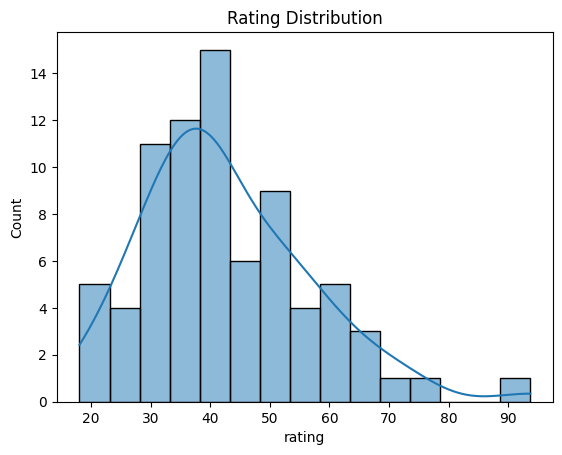

In [ ]:
g = sns.histplot(data= cereal_num, x="rating", kde=True, bins= 15, )
g.set_title("Rating Distribution")
plt.show()

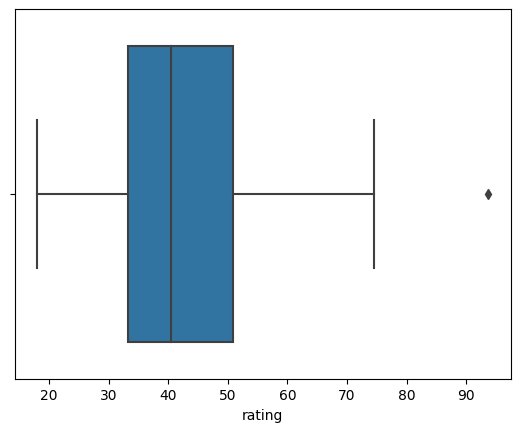

In [ ]:
sns.boxplot(data= cereal_num, x="rating")
plt.show()

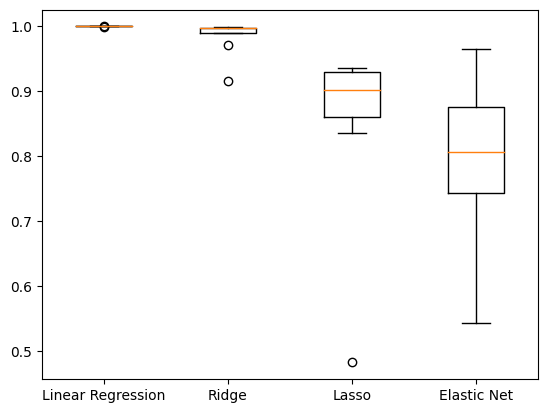

In [ ]:
#Selecting our features and target variable
X= cereal_num.drop(["shelf", "rating"], axis =1).values
y= cereal_num["rating"].values

#Train several models and evaluate performance out of the box with no hyperparameter tuning
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=23)
scaler= StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled =scaler.transform(X_test)

models = {"Linear Regression": LinearRegression(), "Ridge": Ridge(), "Lasso": Lasso(), "Elastic Net": ElasticNet()}

results = []

for model in models.values():
  kf = KFold(n_splits=10, shuffle= True, random_state= 23)
  cv_results = cross_val_score(model, X_train_scaled, y_train, cv=kf)

  results.append(cv_results)

plt.boxplot(results, labels= models.keys())
plt.show()

The output shows a range of cross validation R squared scores. We can also see the median of each models cross validation score represented by the orange line in each box. We can see Linear Regression has the best median score.

In [ ]:
#Test Set Performance of out of the box models
for name, model in models.items():
  model.fit(X_train_scaled, y_train)
  y_pred = model.predict(X_test_scaled)
  test_score = model.score(X_test_scaled, y_test)
  rmse = mean_squared_error(y_test, y_pred, squared=False)
  print("{} Test Set Score: {}".format(name, test_score), "{} Root Mean Squared Error: {}".format(name, rmse))



Linear Regression Test Set Score: 0.9999977714382854 Linear Regression Root Mean Squared Error: 0.02417700726704331
Ridge Test Set Score: 0.9973563712557248 Ridge Root Mean Squared Error: 0.8327035977023038
Lasso Test Set Score: 0.9504592711685729 Lasso Root Mean Squared Error: 3.604718904415802
Elastic Net Test Set Score: 0.8847623001971101 Elastic Net Root Mean Squared Error: 5.497781795074428


In [ ]:
#Let's tune the hyperparamter of some of our models
#we'd split the data and perform cross-validation on the training set then evaluate the tuned model on the test set

kf= KFold(n_splits=10, shuffle=True, random_state=23)

#set upthe parameter grid
param_grid={"alpha": np.arange(0.0001, 1, 10), "solver": ["sag", "lsqr"]}

#Instantiate ridge
ridge = Ridge()

#Instatiate grid_cv
grid_cv= GridSearchCV(ridge, param_grid, cv=kf)

#Fit to the training data
grid_cv.fit(X_train_scaled, y_train)

#Let's print the hyperparameters that perform the best and the mean cross validation score over 10 folds
print(grid_cv.best_params_, grid_cv.best_score_)

{'alpha': 0.0001, 'solver': 'lsqr'} 0.999945550274737


In [ ]:
#Instatiate ridge with our best hyperparameter
ridge = Ridge(alpha=0.0001)
ridge.fit(X_train_scaled, y_train)
y_pred = ridge.predict(X_test_scaled)
print("Test Set Score: ",ridge.score(X_test_scaled, y_test))
print("Root Mean Squared Error: ",mean_squared_error(y_test, y_pred, squared=False))

Test Set Score:  0.9999977859623014
Root Mean Squared Error:  0.024098095107379442


Ridge model performs better on unseen data after Hyperparameter tuning.